<div style="color:brown;" align="center">
<h1>Project Title</h1>
<span style="color:orange">
<h5>Impact of Currency on Housing and Migration</h5>
</span>
<h1>Project Team</h1>
<span style="color:orange">
<h5>Anıl Dervişoğlu, 150220344</br>
Deniz Topal, 150230730</br>
Furkan Şahin, 150220336</h5>
</span>
<h1>Summary</h1>
<span style="color:orange">
In this project, we tried to examine the impact of dollar and euro exchange rates on house prices, house sales to foreigners and migration in Turkey. For this purposes, we conduct a data analysis project using the data from Turkish Statistical Institute (TURKSTAT, TUIK in Turkish) and Central Bank of the Republic of Turkey (CBRT, TCMB in Turkish).
</span>
<h1>Problem Definition</h1>
<span style="color:orange">
The depreciation of the Turkish Lira against the dollar and euro has had a profound impact on Turkey’s economic condition. These changes in economic state of Turkey have led to various issues. Such as increase in the house prices, increase in the foreign population etc. In this project we will first investigate the supporting ideas of depreciation of Turkish Lira, then we will investigate if the issues stated are primarily stem from the currency change. We will also try to predict a model for future usage as well.
</span>
</div>

<h1 style="color:brown" align="center">Datasets and Sources</h1>

In [1]:
#pip install geopandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

<h4 style="color:orange">HOUSE PRICES DATA</h4>

In [3]:
file_path = 'house_prices.xlsx'
hp_data = pd.read_excel(file_path) # abbreviation for housing prices data

hp_data.head()

,Tarih,Toplam Konut Satış (Adet),Türkiye Konut Birim Fiyatları (TL/m2)
0,2011-06,NaN,1083.2
1,2011-07,NaN,1090.1
2,2011-08,NaN,1091.2
3,2011-09,NaN,1107.6
4,2011-10,NaN,1117.3


In [4]:
# Making the column names English
hp_data.columns = ['Date', 'Total House Sales (Units)', 'Turkey House Unit Prices (TL/m2)']

# Cleaning the NaN values and resetting the index afterwards
hp_data.dropna(inplace=True)
hp_data.reset_index(drop=True, inplace=True)

hp_data.head()

,Date,Total House Sales (Units),Turkey House Unit Prices (TL/m2)
0,2013-01,87444.0,1312.6
1,2013-02,88519.0,1334.2
2,2013-03,97956.0,1353.1
3,2013-04,95381.0,1369.6
4,2013-05,103261.0,1386.2


<h4 style="color:orange">FOREIGN CURRENCY DATA</h4>

In [5]:
file_path = 'foreign_currency.xlsx'
fc_data = pd.read_excel(file_path) # abbreviation for foreign currency data

fc_data.head()

,Unnamed: 0,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,...,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
0,(USD) ABD Doları (Döviz Alış),1.763859,1.769925,1.807195,1.796471,1.822777,1.894510,1.930483,1.954705,2.017148,...,18.969309,19.302253,19.684048,23.064489,26.422738,26.950577,26.940919,27.796032,28.585586,28.918608
1,(EUR) Euro (Döviz Alış),2.341359,2.368875,2.344810,2.335514,2.366627,2.498660,2.523952,2.601842,2.690190,...,20.288852,21.148911,21.425481,24.944284,29.204086,29.428700,28.820471,29.356750,30.846945,31.365954
2,(USD) ABD Doları (Döviz Alış)-Yüzde Değişim,-0.856133,0.3439,2.105752,-0.593395,1.464306,3.935353,1.898782,1.254746,3.194464,...,0.775627,1.755172,1.977982,17.173510,14.560256,1.997670,-0.035837,3.174030,2.840530,1.164997
3,(EUR) Euro (Döviz Alış)-Yüzde Değişim,0.347647,1.175211,-1.015903,-0.396418,1.332169,5.578940,1.012230,3.086030,3.395608,...,0.469879,4.239069,1.307729,16.423450,17.077265,0.769119,-2.066787,1.860756,5.076160,1.682528
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Getting the Transpose of the data to make it more compatible with the other data
fc_data = fc_data.iloc[:4]
fc_data = fc_data.T

fc_data.columns = fc_data.iloc[0]
fc_data = fc_data.iloc[1:]

# Renaming the columns in English
fc_data.reset_index(inplace=True)
fc_data.columns = ['Date', '(USD) US Dollar (Foreign Exchange Buying)', '(EUR) Euro (Foreign Exchange Buying)', '(USD) US Dollar (Foreign Exchange Buying)-Percentage Change', '(EUR) Euro (Foreign Exchange Buying)-Percentage Change']

# Cleaning the NaN values and resetting the index afterwards
fc_data.dropna(inplace=True)
fc_data.reset_index(drop=True, inplace=True)

fc_data.head()

,Date,(USD) US Dollar (Foreign Exchange Buying),(EUR) Euro (Foreign Exchange Buying),(USD) US Dollar (Foreign Exchange Buying)-Percentage Change,(EUR) Euro (Foreign Exchange Buying)-Percentage Change
0,2013-01,1.763859,2.341359,-0.856133,0.347647
1,2013-02,1.769925,2.368875,0.3439,1.175211
2,2013-03,1.807195,2.34481,2.105752,-1.015903
3,2013-04,1.796471,2.335514,-0.593395,-0.396418
4,2013-05,1.822777,2.366627,1.464306,1.332169


<h4 style="color:orange">MIGRATION DATA</h4>

In [7]:
xls = pd.ExcelFile(r"migration.xls")
migration_data = xls.parse(0)
migration_data = migration_data.iloc[3:-10, :]
migration_data.columns = migration_data.iloc[0]
migration_data = migration_data[1:]

migration_data.head(10)

3,NaN,NaN,Toplam\nTotal,Erkek\nMale,Kadın\nFemale,NaN,Toplam\nTotal,Erkek\nMale,Kadın\nFemale,NaN
4,2022,Toplam-Total,494052,261201,232851,NaN,466914,260245,206669,27138
5,NaN,Türk vatandaşları-Turkish citizens,94409,55832,38577,NaN,139531,84835,54696,-45122
6,NaN,Yabancı uyruklular-Foreign nationals,399643,205369,194274,NaN,327383,175410,151973,72260
7,NaN,Rusya Federasyonu-Russian Federation,99786,56236,43550,NaN,11862,5021,6841,87924
8,NaN,Ukrayna-Ukraine,32465,10331,22134,NaN,4161,1408,2753,28304
9,NaN,İran-Iran,25802,12560,13242,NaN,34563,18750,15813,-8761
10,NaN,Afganistan-Afghanistan,21469,14919,6550,NaN,19582,12418,7164,1887
11,NaN,Irak-Iraq,19245,10228,9017,NaN,65406,35379,30027,-46161
12,NaN,Azerbaycan-Azerbaijan,18232,9288,8944,NaN,13925,7941,5984,4307
13,NaN,Kazakistan-Kazakhstan,15713,6997,8716,NaN,7178,3080,4098,8535


Our migration dataset provides a detailed breakdown of migration to and from Turkey between 2016 and 2022, covering each year and the countries involved. We aim to streamline the dataset by eliminating redundant columns and filling missing values appropriately.

In [8]:
# This line of code removes unnecessary columns and renames the remaining columns.
migration_data.drop(migration_data.columns[[3,4,5,7,8]], axis=1, inplace=True) 
migration_data.columns = ["Year", "Country", "Immigrants", "Emmigrants", "Net Migration"]

# This line of code fills in the years entered as NaN and removes the Turkish part from the country names.
migration_data['Year'].fillna(method='ffill', inplace=True)
migration_data['Country'] = migration_data['Country'].str.split('-').str[1]
migration_data["Country"] =migration_data["Country"].fillna("Turkish citizens")

migration_data.head(10)

,Year,Country,Immigrants,Emmigrants,Net Migration
4,2022,Total,494052,466914,27138
5,2022,Turkish citizens,94409,139531,-45122
6,2022,Foreign nationals,399643,327383,72260
7,2022,Russian Federation,99786,11862,87924
8,2022,Ukraine,32465,4161,28304
9,2022,Iran,25802,34563,-8761
10,2022,Afghanistan,21469,19582,1887
11,2022,Iraq,19245,65406,-46161
12,2022,Azerbaijan,18232,13925,4307
13,2022,Kazakhstan,15713,7178,8535


Finally, a data view of each country's migration data between 2016 and 2022.

<h4 style="color:orange">DATA OF HOUSE SALES TO FOREIGNERS</h4>

In [9]:
# Parsing from excel file.
xls = pd.ExcelFile(r"house_sales_foreigners.xls")
foreigners_housing = xls.parse(0)

# Removing unnecessary parts.
foreigners_housing = foreigners_housing.iloc[1:-3,:]
foreigners_housing.columns = foreigners_housing.iloc[0]
foreigners_housing = foreigners_housing[1:]
foreigners_housing = foreigners_housing[11:]
foreigners_housing.iloc[115:, :]

foreigners_housing.head(10)

1,Yıl Year,Ay\nMonth,Toplam\nTotal,Yabancılara yapılan satışlar\nSales to foreigners,Pay \nShare (%)
13,2013,Ocak - January,87444,888,1.015507
14,NaN,Şubat - February,88519,716,0.808866
15,NaN,Mart - March,97956,962,0.982074
16,NaN,Nisan - April,95381,947,0.99286
17,NaN,Mayıs - May,103261,938,0.908378
18,NaN,Haziran - June,96424,783,0.812038
19,NaN,Temmuz - July,106636,1114,1.044675
20,NaN,Ağustos - August,84480,890,1.053504
21,NaN,Eylül - September,102280,1025,1.002151
22,NaN,Ekim - October,76344,1021,1.337368


In [10]:
# Converting column names to english only.
column_names = ['Year', 'Month', 'Total', 'Sales to foreigners', 'Share']
foreigners_housing.columns = column_names

# Reset indexes.
foreigners_housing.reset_index(inplace=True, drop=True)

# Fill NA's with proper years.
foreigners_housing['Year'] = foreigners_housing['Year'].fillna(method='ffill')

# Merge month and year columns into single date column as 'yyyy-m'.
foreigners_housing['Month'] = foreigners_housing.index
foreigners_housing['Month'] = foreigners_housing['Month'] % 12 + 1
foreigners_housing['Year'] = foreigners_housing['Year'].astype(str) + '-' + foreigners_housing['Month'].astype(str)
foreigners_housing['Share'] = foreigners_housing['Share'].astype(float).round(decimals=1)
foreigners_housing.drop(['Month'], axis=1, inplace=True)
foreigners_housing = foreigners_housing.rename(columns={'Year': 'Date'})

foreigners_housing.head(10)

,Date,Total,Sales to foreigners,Share
0,2013-1,87444,888,1.0
1,2013-2,88519,716,0.8
2,2013-3,97956,962,1.0
3,2013-4,95381,947,1.0
4,2013-5,103261,938,0.9
5,2013-6,96424,783,0.8
6,2013-7,106636,1114,1.0
7,2013-8,84480,890,1.1
8,2013-9,102280,1025,1.0
9,2013-10,76344,1021,1.3


<div style="color:brown" align="center">
<h1>RESEARCH QUESTIONS</h1>
<h5 style="color:orange"> Does a significant correlation exist between the demographic composition (or migration) of foreign residents in Turkey and changes in the exchange rates of the Turkish Lira, if so what is the correlation coefficient?</h5>
<h5 style="color:orange">If the upward trajectory of both the dollar and the euro persists, what impact can be anticipated on the future escalation of house prices over the course of the coming years? Would it also increase upwards in the future?</h5>
<h5 style="color:orange">How do changes in the exchange rates of the Turkish Lira influence the demographic composition of foreign residents in Turkey?</h5>
<h5 style="color:orange">How do migration rates in Turkey relate to changes in house prices and the number of houses sold during the same time frame?</h5>
</div>

<h1 style="color:brown" align="center">EDA - VISUALIZATION</h1>

<h4 style="color:orange">VISUALIZATION - HOUSE PRICES</h4>

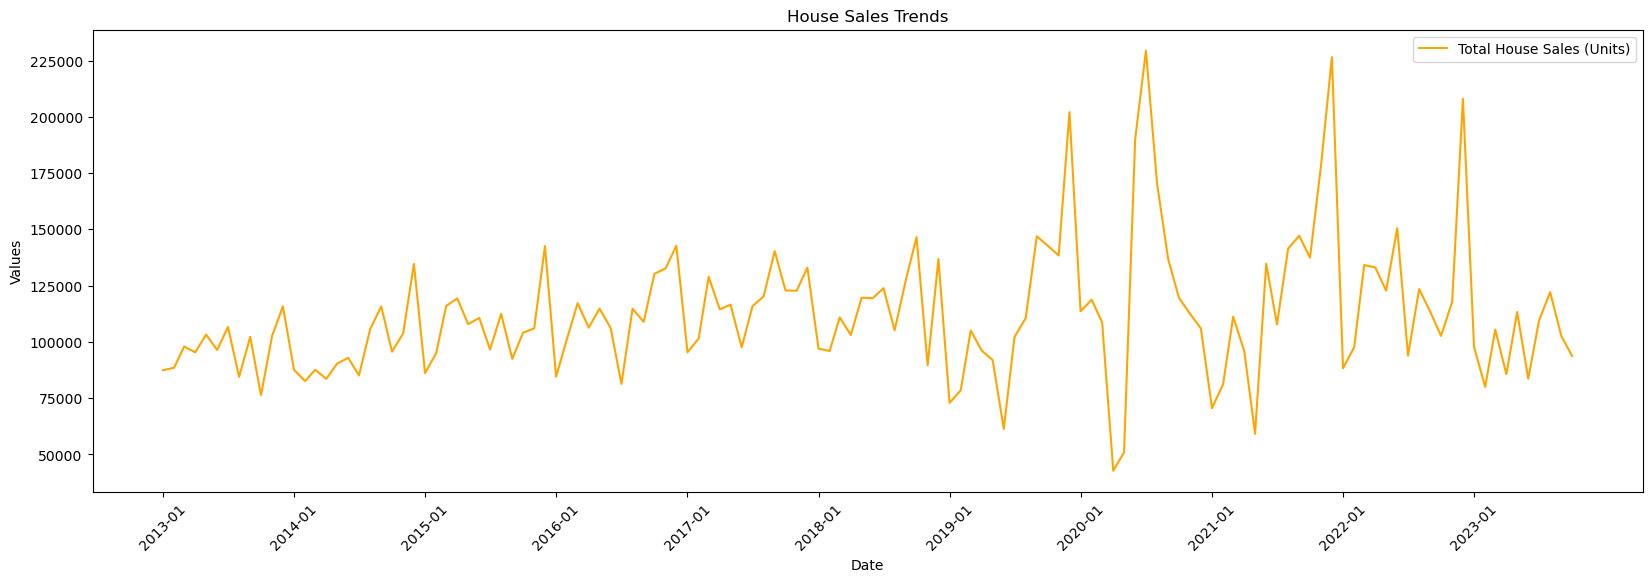

In [11]:
# We get all the "Date" values in all datasets into same format of datetime
hp_data['Date'] = pd.to_datetime(hp_data['Date'])

# PLOTTING
plt.figure(figsize=(20, 6))

plt.plot(hp_data['Date'], hp_data['Total House Sales (Units)'], label='Total House Sales (Units)', color='orange')

plt.title('House Sales Trends')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(hp_data['Date'])
plt.legend()

# Below, we are setting the xticks to be the first month of each year to avoid the overlapping of the dates
selected_dates = pd.date_range(start=hp_data['Date'].min(), 
                               end=hp_data['Date'].max(), 
                               freq='YS')
plt.xticks(selected_dates, [date.strftime('%Y-%m') for date in selected_dates], rotation=45)

plt.show()

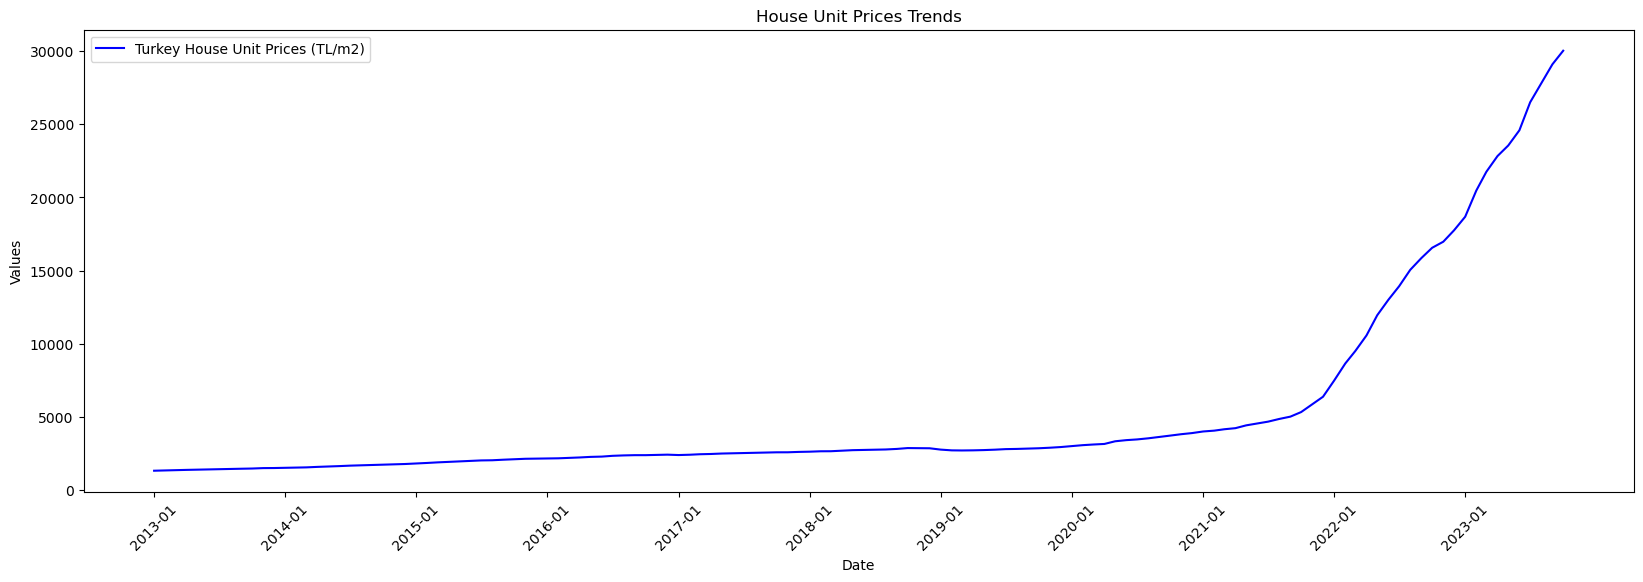

In [12]:
# PLOTTING the House Unit Prices the same way
plt.figure(figsize=(20, 6))

plt.plot(hp_data['Date'], hp_data['Turkey House Unit Prices (TL/m2)'], label='Turkey House Unit Prices (TL/m2)', color='blue')

plt.title('House Unit Prices Trends')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(hp_data['Date'])
plt.legend()

selected_dates = pd.date_range(start=hp_data['Date'].min(), 
                               end=hp_data['Date'].max(), 
                               freq='YS')
plt.xticks(selected_dates, [date.strftime('%Y-%m') for date in selected_dates], rotation=45)

plt.show()

<h4 style="color:orange">VISUALIZATION - FOREIGN CURRENCY</h4>

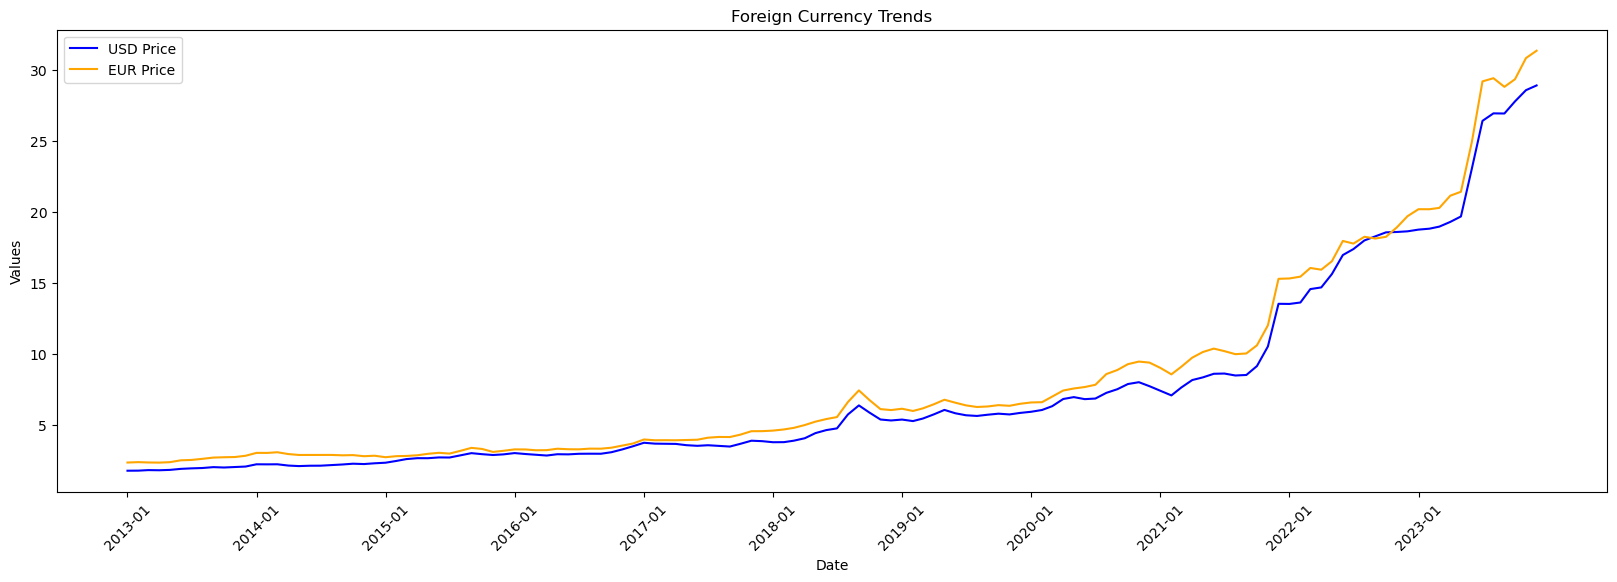

In [13]:
# We get all the "Date" values in all datasets into same format of datetime
fc_data['Date'] = pd.to_datetime(fc_data['Date'])

# PLOTTING both USD and EUR prices
plt.figure(figsize=(20, 6))

plt.plot(fc_data['Date'], fc_data['(USD) US Dollar (Foreign Exchange Buying)'], label='USD Price', color='blue')

plt.plot(fc_data['Date'], fc_data['(EUR) Euro (Foreign Exchange Buying)'], label='EUR Price', color='orange')

plt.title('Foreign Currency Trends')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(fc_data['Date'])
plt.legend()

# Below, we are setting the xticks to be the first month of each year to avoid the overlapping of the dates
selected_dates = pd.date_range(start=fc_data['Date'].min(), 
                               end=fc_data['Date'].max(), 
                               freq='YS')
plt.xticks(selected_dates, [date.strftime('%Y-%m') for date in selected_dates], rotation=45)

plt.show()

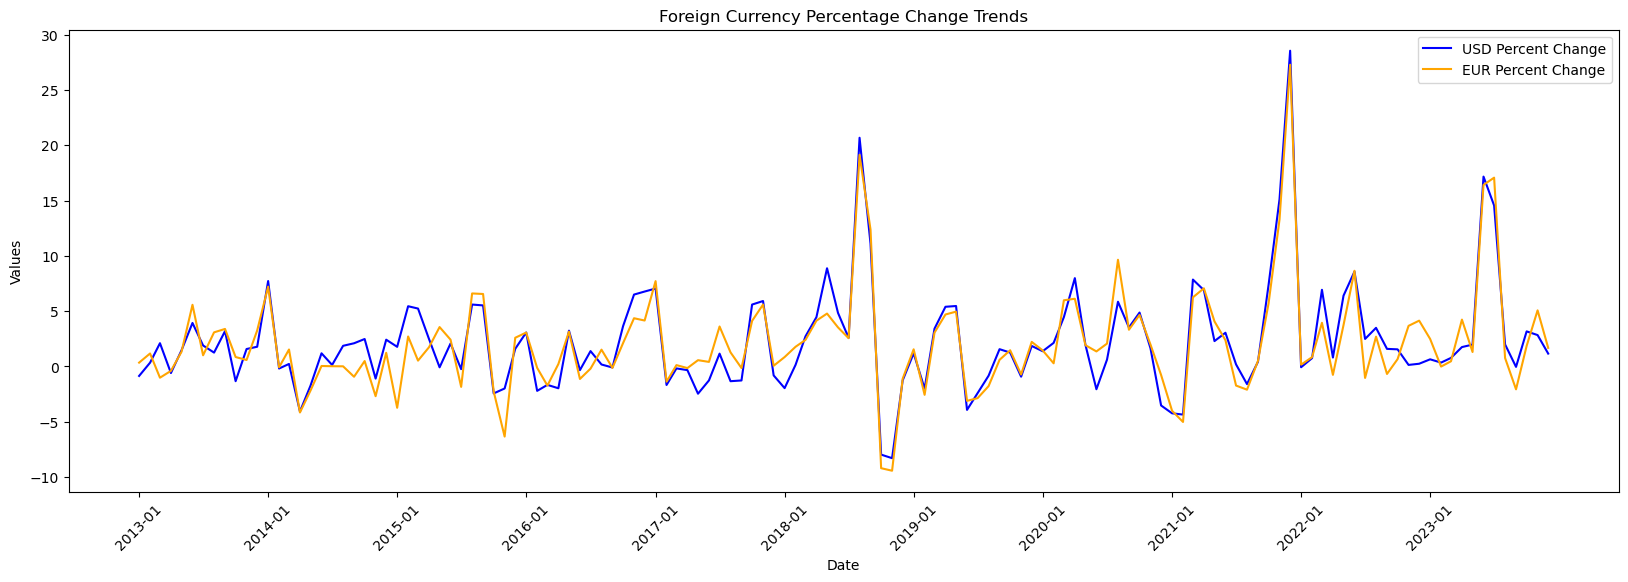

In [14]:
#PLOTTING the Percentage Currency Changes the same way
plt.figure(figsize=(20, 6))

plt.plot(fc_data['Date'], fc_data['(USD) US Dollar (Foreign Exchange Buying)-Percentage Change'], label='USD Percent Change', color='blue')

plt.plot(fc_data['Date'], fc_data['(EUR) Euro (Foreign Exchange Buying)-Percentage Change'], label='EUR Percent Change', color='orange')

plt.title('Foreign Currency Percentage Change Trends')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(fc_data['Date'])
plt.legend()

selected_dates = pd.date_range(start=fc_data['Date'].min(), 
                               end=fc_data['Date'].max(), 
                               freq='YS')
plt.xticks(selected_dates, [date.strftime('%Y-%m') for date in selected_dates], rotation=45)

plt.show()

<h4 style="color:orange">VISUALIZATION - MIGRATION</h4>

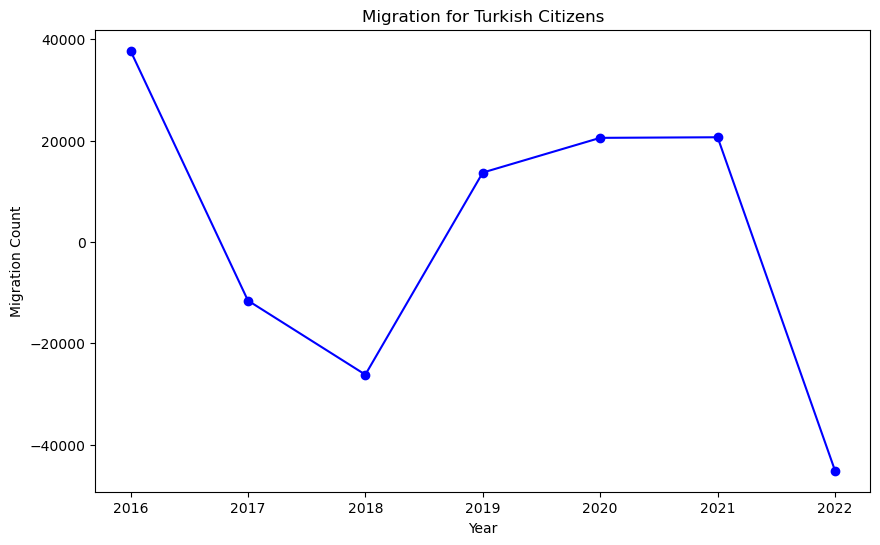

In [15]:
# A line graph is created using the total Turkish citizen migration data in the previously cleaned migration data.
net_migration_for_turkish_citizens_df = migration_data[migration_data["Country"] == "Turkish citizens"]

plt.figure(figsize=(10, 6))
plt.plot(net_migration_for_turkish_citizens_df['Year'], net_migration_for_turkish_citizens_df['Net Migration'], marker='o', linestyle='-', color='b')
plt.title('Migration for Turkish Citizens')
plt.xlabel('Year')
plt.ylabel('Migration Count')

plt.show()

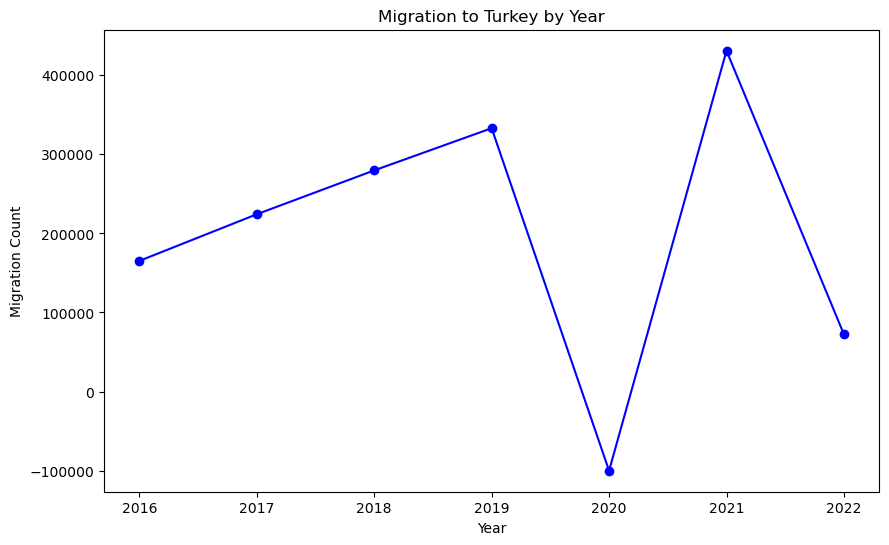

In [16]:
#A line graph is created using the total foreign migration data in the previously cleaned migration data.
net_migration_for_foreign_nationals_df = migration_data[migration_data["Country"] == "Foreign nationals"]

plt.figure(figsize=(10, 6))
plt.plot(net_migration_for_foreign_nationals_df['Year'], net_migration_for_foreign_nationals_df['Net Migration'], marker='o', linestyle='-', color='b')
plt.title('Migration to Turkey by Year')
plt.xlabel('Year')
plt.ylabel('Migration Count')

plt.show()

In [17]:
# We specifically get the migration data for the year 2016 and 2022 to answer our research questions later on.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
migration_data_2016 = migration_data[migration_data["Year"] == 2016]
migration_data_2022 = migration_data[migration_data["Year"] == 2022]

C:\Users\anild\AppData\Local\Temp\ipykernel_16412\2598214138.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [18]:
# Below, we identify the country names that differ between the geopandas and our dataset.
# This is done to improve the compatibility between the two datasets and the correctness of the final map visualization.

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

unmatched_countries = []
for country in migration_data['Country']:
    if country not in world['name'].unique() and country not in {'Foreign nationals', 'Total', 'Other countries', 'Stateless', 'Unknown'}:
        unmatched_countries.append(country)

unmatched_countries

# world.name.unique()

# Restart the data frame again if you want to get the unmatched countries

C:\Users\anild\AppData\Local\Temp\ipykernel_16412\1018812434.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


['Turkish citizens',
 'Russian Federation',
 'United States',
 'Bosnia and Herzegovina',
 'Republic of South Africa',
 'Democratic Republic of the Congo',
 'Turkish Republic Of North Cyprus',
 'Bahrain',
 'Equatorial Guinea',
 'Turkish citizens',
 'Russian Federation',
 'United States',
 'Democratic Republic of the Congo',
 'Bosnia and Herzegovina',
 'Bahrain',
 'Republic of South Africa',
 'The Comoros',
 'Turkish Republic Of North Cyprus',
 'Dominica',
 'Bissau',
 'Saint Kitts and Nevis',
 'Dominican Republic',
 'Turkish citizens',
 'Russian Federation',
 'United States',
 'Bosnia and Herzegovina',
 'Republic of South Africa',
 'Turkish Republic Of North Cyprus',
 'Democratic Republic of the Congo',
 'Turkish citizens',
 'Russian Federation',
 'United States',
 'Republic of South Africa',
 'Democratic Republic of the Congo',
 'Bosnia and Herzegovina',
 'Turkish Republic Of North Cyprus',
 'Bahrain',
 'Dominica',
 'Turkish citizens',
 'Russian Federation',
 'United States',
 'Macedoni

In [19]:
# We change the country names in the migration data to match the names in the geopandas dataset.

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

country_mapping = {
    'Turkish citizens': 'Turkey',
    'Russian Federation': 'Russia',
    'United States': 'United States of America',
    'Bosnia and Herzegovina': 'Bosnia and Herz.',
    'Republic of South Africa': 'South Africa',
    'Democratic Republic of the Congo': 'Dem. Rep. Congo',
    'Turkish Republic Of North Cyprus': 'N. Cyprus',
    'Turkish Republic of North Cyprus': 'N. Cyprus',
    'Equatorial Guinea': 'Eq. Guinea',
    'Dominican Republic': 'Dominican Rep.',
    'Bissau': 'Guinea-Bissau',
    'Ivory Coast': "Côte d'Ivoire",
    'Macedonia': 'North Macedonia',
    'Lübnan': 'Lebanon',
}

migration_data['Country'] = migration_data['Country'].replace(country_mapping)
migration_data_2022['Country'] = migration_data_2022['Country'].replace(country_mapping)
migration_data_2016['Country'] = migration_data_2016['Country'].replace(country_mapping)

C:\Users\anild\AppData\Local\Temp\ipykernel_16412\2374332764.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\anild\AppData\Local\Temp\ipykernel_16412\2374332764.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migration_data_2022['Country'] = migration_data_2022['Country'].replace(country_mapping)
C:\Users\anild\AppData\Local\Temp\ipykernel_16412\2374332764.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

C:\Users\anild\AppData\Local\Temp\ipykernel_16412\3480832241.py:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, shrink=0.5)


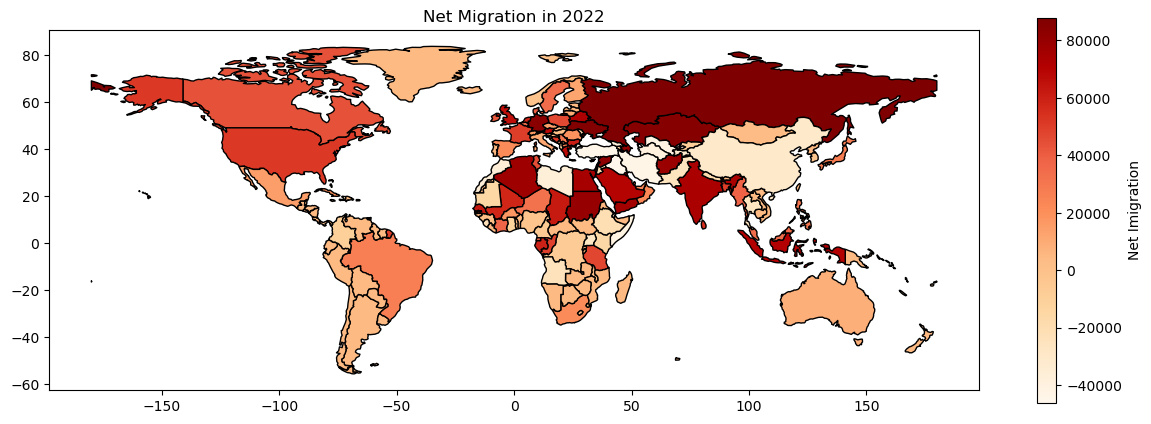

In [20]:
# Below we merge the geopandas dataset with the migration data for the year 2016.
# Then, we fill the NaN values with 0 to avoid any errors in the map visualization.
# Finally, we plot the map and the legend as shown.

merged_data_1 = world.merge(migration_data_2022, left_on='name', right_on='Country', how='left')
for i in range(merged_data_1.shape[0]):
    if pd.isnull(merged_data_1.loc[i, 'Net Migration']) and merged_data_1.loc[i, 'name'] != 'Antarctica':
        merged_data_1.loc[i, 'Net Migration'] = 0

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data_1.plot(column='Net Migration', cmap='OrRd', linewidth=1, ax=ax, edgecolor='black')

ax.set_title('Net Migration in 2022')

sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=merged_data_1['Net Migration'].min(), vmax=merged_data_1['Net Migration'].max()))
sm._A = []
cbar = plt.colorbar(sm,ax=ax, shrink=0.5)
cbar.set_label("Net Imigration")

C:\Users\anild\AppData\Local\Temp\ipykernel_16412\2644116872.py:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, shrink=0.5)


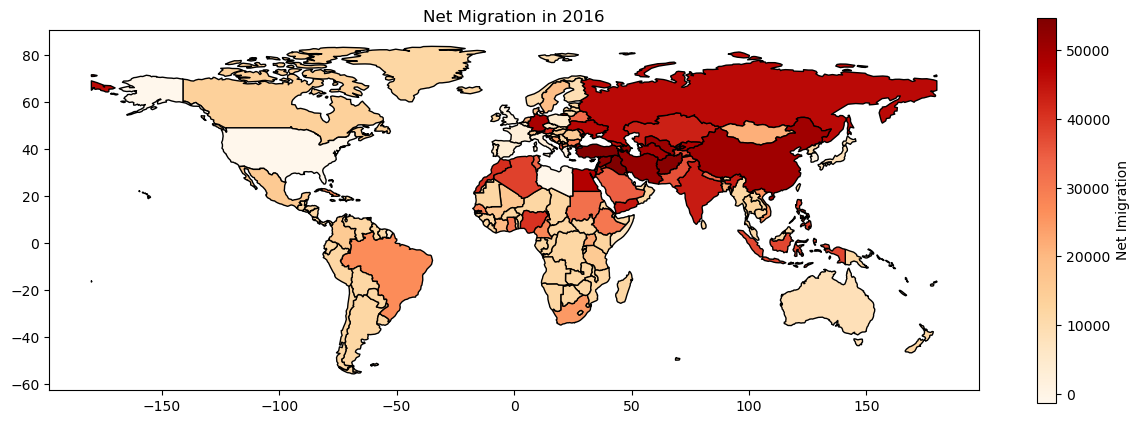

In [21]:
# The same process as the above, but for the year 2016.

merged_data_2 = world.merge(migration_data_2016, left_on='name', right_on='Country', how='left')
for i in range(merged_data_2.shape[0]):
    if pd.isnull(merged_data_2.loc[i, 'Net Migration']) and merged_data_1.loc[i, 'name'] != 'Antarctica':
        merged_data_2.loc[i, 'Net Migration'] = 0

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data_2.plot(column='Net Migration', cmap='OrRd', linewidth=1, ax=ax, edgecolor='black')

ax.set_title('Net Migration in 2016')
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=merged_data_2['Net Migration'].min(), vmax=merged_data_2['Net Migration'].max()))
sm._A = []
cbar = plt.colorbar(sm,ax=ax, shrink=0.5)
cbar.set_label("Net Imigration")

<h4 style="color:orange">VISUALIZATION - FOREIGN HOUSING</h4>

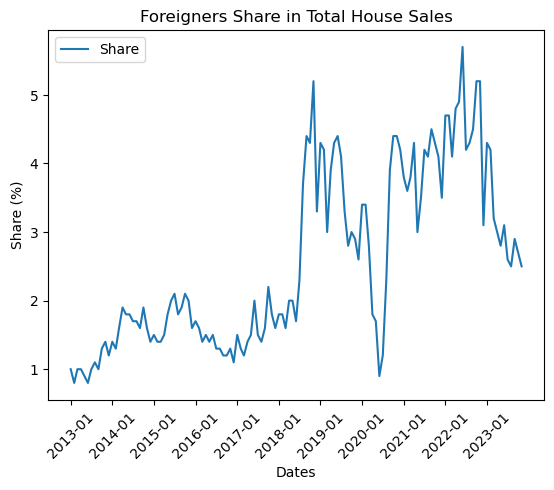

In [22]:
# A line graph made to show the relationship between shares (foreign) and dates. 
foreigners_housing['Date'] = pd.to_datetime(foreigners_housing['Date']) # Convert to datetime object

plt.figsize = (20,16)

# Plot the graph
plt.plot(foreigners_housing['Date'], foreigners_housing['Share'], label='Share')

plt.title('Foreigners Share in Total House Sales')
plt.xlabel('Dates')
plt.ylabel('Share (%)')
plt.legend()

# Have ticks for selected_dates
selected_dates = pd.date_range(start=foreigners_housing['Date'].min(), 
                               end=foreigners_housing['Date'].max(), 
                               freq='YS')  # 'YS' stands for 'year start'
plt.xticks(selected_dates, [date.strftime('%Y-%m') for date in selected_dates], rotation=45)

plt.show()

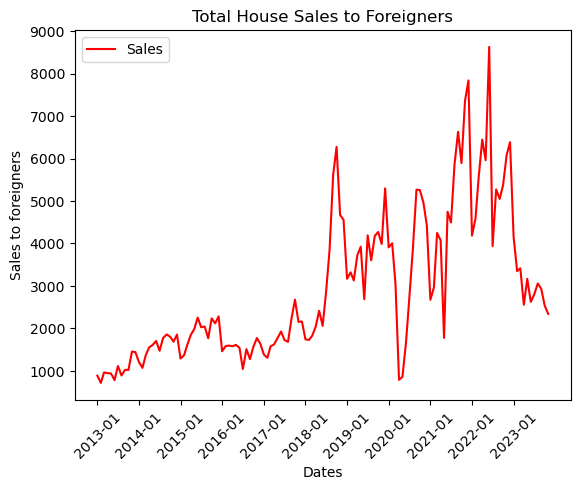

In [23]:
# A line graph made to show the relationship between sales (foreign) and dates. 
plt.figsize = (10,8)

plt.plot(foreigners_housing['Date'], foreigners_housing['Sales to foreigners'], color='red', label='Sales')

plt.title('Total House Sales to Foreigners')
plt.xlabel('Dates')
plt.ylabel('Sales to foreigners')
plt.legend()

selected_dates = pd.date_range(start=foreigners_housing['Date'].min(), 
                               end=foreigners_housing['Date'].max(), 
                               freq='YS')  # 'YS' stands for 'year start'
plt.xticks(selected_dates, [date.strftime('%Y-%m') for date in selected_dates], rotation=45)

plt.show()

<h1 style="color:brown" align="center">ANSWERS TO RESEARCH QUESTIONS AND TESTS</h1>

<h5 style="color:orange"> Does a significant correlation exist between the demographic composition (or migration) of foreign residents in Turkey and changes in the exchange rates of the Turkish Lira, if so what is the correlation coefficient?</h5>

To check any possible correlation, we will first get both dataframes into same style and merge them as follows:

In [24]:
# Below, we create a new dataframe to store the yearly percentage changes of the foreign currencies
# This is done to match the format of the other dataframe of migration data which is given in yearly format
temp_fc = fc_data

temp_fc.set_index('Date', inplace=True)

fc_year_data = pd.DataFrame({'Date':2013, 'USD':temp_fc.loc[f"2013-01-01", "(USD) US Dollar (Foreign Exchange Buying)"], 'EUR':temp_fc.loc[f"2013-01-01", "(EUR) Euro (Foreign Exchange Buying)"], 'USD-Percentage Change':0, 'EUR-Percentage Change':0}, index=[0])

# For each year, we calculate the percentage change in both USD and EUR comparing the values in January.
for year in range(2014, 2023):
    df = {  'Date':[year],
            'USD':[temp_fc.loc[f"{year}-01-01", "(USD) US Dollar (Foreign Exchange Buying)"]],
            'EUR':[temp_fc.loc[f"{year}-01-01", "(EUR) Euro (Foreign Exchange Buying)"]],
            'USD-Percentage Change':[(temp_fc.loc[f"{year}-01-01", "(USD) US Dollar (Foreign Exchange Buying)"] - temp_fc.loc[f"{year - 1}-01-01", "(USD) US Dollar (Foreign Exchange Buying)"])/temp_fc.loc[f"{year - 1}-01-01", "(USD) US Dollar (Foreign Exchange Buying)"]],
            'EUR-Percentage Change':[(temp_fc.loc[f"{year}-01-01", "(EUR) Euro (Foreign Exchange Buying)"] - temp_fc.loc[f"{year - 1}-01-01", "(EUR) Euro (Foreign Exchange Buying)"])/temp_fc.loc[f"{year - 1}-01-01", "(EUR) Euro (Foreign Exchange Buying)"]]}

    fc_year_data = pd.concat([fc_year_data, pd.DataFrame(df)], ignore_index=True)

fc_year_data.head(10)

,Date,USD,EUR,USD-Percentage Change,EUR-Percentage Change
0,2013,1.763859,2.341359,0.000000,0.000000
1,2014,2.216836,3.021532,0.256810,0.290503
2,2015,2.328343,2.716214,0.050300,-0.101047
3,2016,3.006950,3.266920,0.291455,0.202748
4,2017,3.734886,3.965486,0.242085,0.213830
5,2018,3.772327,4.591282,0.010025,0.157811
6,2019,5.369391,6.132432,0.423363,0.335669
7,2020,5.918159,6.575059,0.102203,0.072178
8,2021,7.393975,9.008090,0.249371,0.370039
9,2022,13.519262,15.314795,0.828416,0.700116


In [25]:
# As we get both dataframes in the same format, we can merge them
merged_data = migration_data.merge(fc_year_data, left_on='Year', right_on='Date',how='left')

In [26]:
# For Turkish residents:
filt = (merged_data['Country'] == 'Turkey')
turks_migration_data = merged_data[filt]
turks_migration_data.head(10)

,Year,Country,Immigrants,Emmigrants,Net Migration,Date,USD,EUR,USD-Percentage Change,EUR-Percentage Change
1,2022,Turkey,94409,139531,-45122,2022,13.519262,15.314795,0.828416,0.700116
115,2021,Turkey,124269,103613,20656,2021,7.393975,9.008090,0.249371,0.370039
245,2020,Turkey,98349,77810,20539,2020,5.918159,6.575059,0.102203,0.072178
343,2019,Turkey,98554,84863,13691,2019,5.369391,6.132432,0.423363,0.335669
455,2018,Turkey,110567,136740,-26173,2018,3.772327,4.591282,0.010025,0.157811
559,2017,Turkey,101772,113326,-11554,2017,3.734886,3.965486,0.242085,0.213830
653,2016,Turkey,107052,69326,37726,2016,3.006950,3.266920,0.291455,0.202748


In [27]:
# For foreign residents:
filt = (merged_data['Country'] == 'Foreign nationals')
foreigners_migration_data = merged_data[filt]
foreigners_migration_data.head(10)

,Year,Country,Immigrants,Emmigrants,Net Migration,Date,USD,EUR,USD-Percentage Change,EUR-Percentage Change
2,2022,Foreign nationals,399643,327383,72260,2022,13.519262,15.314795,0.828416,0.700116
116,2021,Foreign nationals,615095,184038,431057,2021,7.393975,9.008090,0.249371,0.370039
246,2020,Foreign nationals,242496,342653,-100157,2020,5.918159,6.575059,0.102203,0.072178
344,2019,Foreign nationals,578488,245426,333062,2019,5.369391,6.132432,0.423363,0.335669
456,2018,Foreign nationals,466890,187178,279712,2018,3.772327,4.591282,0.010025,0.157811
560,2017,Foreign nationals,364561,140314,224247,2017,3.734886,3.965486,0.242085,0.213830
654,2016,Foreign nationals,273869,108634,165235,2016,3.006950,3.266920,0.291455,0.202748


In [28]:
# Seperating all the data into different variables for easier usage
years = turks_migration_data['Year']
foreign_migration = foreigners_migration_data['Net Migration']
turk_migration = turks_migration_data['Net Migration']
dollar_change = turks_migration_data['USD-Percentage Change']
euro_change = turks_migration_data['EUR-Percentage Change']

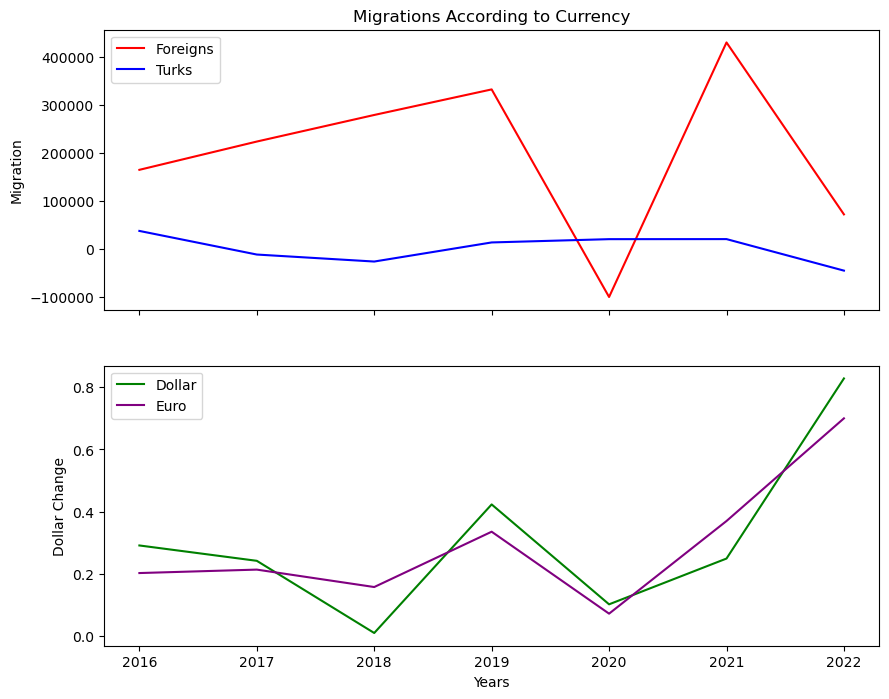

In [29]:
# Here, we plot the data in two different subplots to make it easier to compare
# The correlation between them will be calculated later on
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

ax1.plot(years, foreign_migration, label='Foreigns', color='red')
ax1.plot(years, turk_migration, label='Turks', color='blue')
ax1.set_ylabel('Migration')
ax1.legend(loc='upper left')
ax1.set_title('Migrations According to Currency')

ax2.plot(years, dollar_change, label='Dollar', color='green')
ax2.plot(years, euro_change, label='Euro', color='purple')
ax2.set_xlabel('Years')
ax2.set_ylabel('Dollar Change')
ax2.legend(loc='upper left')

plt.show()

We can somehow observe a correlation to some extent, but we will further clarify our answer with calculating the correlation coefficient.

To answer that, we first need to create a function which calculates the correlation coefficient:

In [30]:
# Using the function below, we can calculate the correlation coefficient
def corr(x: pd.Series, y: pd.Series) -> float: 
    x_mean = x.mean()
    y_mean = y.mean()
    cov_numerator = 0
    # calculating the covariance
    for i in range(len(x)):
        cov_numerator += ((x.iloc[i] - x_mean) * (y.iloc[i] - y_mean))
    cov = cov_numerator / (len(x) - 1)

    # calculating the standard deviation of x
    x_std_numerator = 0 
    for i in range(len(x)):
        x_std_numerator += ((x.iloc[i] - x_mean) ** 2) 
    x_std = (x_std_numerator / (len(x) - 1)) ** 0.5 

    # calculating the standard deviation of y
    y_std_numerator = 0
    for i in range(len(y)):
        y_std_numerator += ((y.iloc[i] - y_mean) ** 2)
    y_std = (y_std_numerator / (len(y) - 1)) ** 0.5

    # calculating the correlation coefficient
    corr = cov / (x_std * y_std)
    
    return corr

Finally, we can calculate the relations between the currency changes and migration as follows:

In [31]:
Turk_res = corr(turks_migration_data['Net Migration'], turks_migration_data['USD-Percentage Change'])
Turk_res_2 = corr(turks_migration_data['Net Migration'], turks_migration_data['EUR-Percentage Change'])
Foreign_res = corr(foreigners_migration_data['Net Migration'], foreigners_migration_data['USD-Percentage Change'])
Foreign_res_2 = corr(foreigners_migration_data['Net Migration'], foreigners_migration_data['EUR-Percentage Change'])
Turk_Foreign_res = corr(turks_migration_data['Net Migration'], foreigners_migration_data['Net Migration'])
print(f"Correlation between Turkish migration and Dollar change: {Turk_res}")
print(f"Correlation between Turkish migration and Euro change: {Turk_res_2}")
print(f"Correlation between Foreign migration and Dollar change: {Foreign_res}")
print(f"Correlation between Foreign migration and Euro change: {Foreign_res_2}")
print(f"Correlation between Turkish and Foreign migration: {Turk_Foreign_res}")

Correlation between Turkish migration and Dollar change: -0.40938796968213037
Correlation between Turkish migration and Euro change: -0.5354684138322698
Correlation between Foreign migration and Dollar change: -0.09870498796522442
Correlation between Foreign migration and Euro change: 0.1295975105647731
Correlation between Turkish and Foreign migration: 0.07994930250970705


From the results, what we can clearly see is that Foreign migration is NOT dependant on Dollar or Euro changes compared to Turkish Lira. But against that, with a moderate strength in its correlation, we can deduce that there is a negative correlation of almost 40% and 50% in both Dollar and Euro respectively with Turkish migration. Which means that as the prices of the foreign currencies increase, the net migration of Turkish citizens will be negative.

<h5 style="color:orange">If the upward trajectory of both the dollar and the euro persists, what impact can be anticipated on the future escalation of house prices over the course of the coming years? Would it also increase upwards in the future?</h5>

Before answering this question, it would be ideal to show that the foreign currencies compared in this project do have similar trends compared to Turkish Lira, and the house prices as well as these foreign currencies have a strong positive correlation as follows:

In [32]:
USD_EUR = corr(fc_year_data['USD-Percentage Change'], fc_year_data['EUR-Percentage Change'])
print(f"Correlation between USD and EUR: {USD_EUR}")

house_unit_and_currency_USD = corr(hp_data['Turkey House Unit Prices (TL/m2)'], fc_data['(USD) US Dollar (Foreign Exchange Buying)'])
house_unit_and_currency_EUR = corr(hp_data['Turkey House Unit Prices (TL/m2)'], fc_data['(EUR) Euro (Foreign Exchange Buying)'])

print(f"Correlation between house unit prices and Dollar change: {house_unit_and_currency_USD}")
print(f"Correlation between house unit prices and Euro change: {house_unit_and_currency_EUR}")

Correlation between USD and EUR: 0.9146010037088368
Correlation between house unit prices and Dollar change: 0.8903276284424504
Correlation between house unit prices and Euro change: 0.8825022029723688


Observing this high and similar correlation coefficients, we can also deduce the depreciation of Turkish Lira. The reason because is that house prices are also an indicator of country's economy. Thus, this high correlation means that both Dollar and Euro has higher valuation which can be seen on the visualizations as well.

Knowing this aspect we can say that house prices will also increase. And this increase can be modelled using the method, exponential regression. This method is chosen per observations in the visuals.

In [33]:
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
hp_data.head()

,Date,Total House Sales (Units),Turkey House Unit Prices (TL/m2)
0,2013-01-01,87444.0,1312.6
1,2013-02-01,88519.0,1334.2
2,2013-03-01,97956.0,1353.1
3,2013-04-01,95381.0,1369.6
4,2013-05-01,103261.0,1386.2


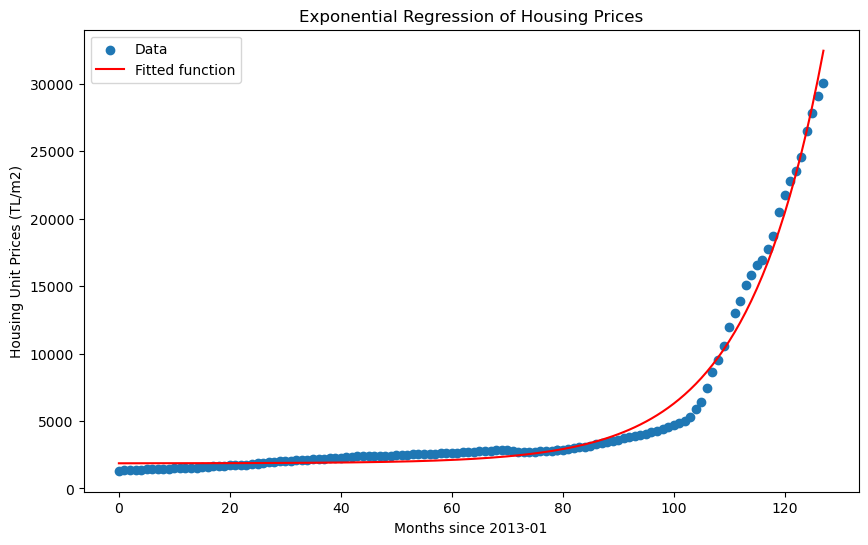

The fitted (or regressed) function was: a * exp(b * x) + c
a = 3.4263475148899007
b = 0.0716312697765575
c = 1860.715720489996


In [35]:
# As the values are given in months, we calculate the months since the first date
start_date = hp_data['Date'].min()
hp_data['Months'] = ((hp_data['Date'] - start_date) / np.timedelta64(1, 'M')).round().astype(int)

x = hp_data['Months']
y = hp_data['Turkey House Unit Prices (TL/m2)']

# We will use exponential regression technique to fit the data as it seems to be the best fit
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

# We use the curve_fit function to get the parameters of the exponential function
params, params_covariance = curve_fit(exponential_func, x, y, p0=[1, 1e-6, 1])

# In the end, we plot the data and the fitted function
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data')
plt.plot(x, exponential_func(x, *params), label='Fitted function', color='red')
plt.title('Exponential Regression of Housing Prices')
plt.xlabel('Months since ' + start_date.strftime('%Y-%m'))
plt.ylabel('Housing Unit Prices (TL/m2)')
plt.legend()
plt.show()

# The parameters of the fitted function are:
print("The fitted (or regressed) function was: a * exp(b * x) + c")
print(f"a = {params[0]}")
print(f"b = {params[1]}")
print(f"c = {params[2]}")

In [36]:
# Using R2 score, we can calculate the accuracy of the fitted function
y_pred = exponential_func(x, *params)
r_squared = r2_score(y, y_pred)

r_squared

0.9865592585725637

In the end, we can create an exponential model with 0.986 $R^2$ score, which can predict that the house prices will be increasing exponentially in the future as well.

<h5 style="color:orange">How do changes in the exchange rates of the Turkish Lira influence the demographic composition of foreign residents in Turkey?</h5>

As an hypothesis, from the results of the questions answered above, we can expect foreigners to buy more house and migrate more and result in a higher correlation if it can be tested. Also from the visualizations of Net migration rates in 2016 and 2022 shown above, we can came up with the same idea as well.

We can further analyze the question by, calculating its correlation coefficient and creating a table as well.

In [37]:
foreign_housing_and_curreny_USD = corr(foreigners_housing['Sales to foreigners'], fc_data['(USD) US Dollar (Foreign Exchange Buying)'])
foreign_housing_and_curreny_EUR = corr(foreigners_housing['Sales to foreigners'], fc_data['(EUR) Euro (Foreign Exchange Buying)'])

print(f"Correlation between foreign housing and Dollar change: {foreign_housing_and_curreny_USD}")
print(f"Correlation between foreign housing and Euro change: {foreign_housing_and_curreny_EUR}")

Correlation between foreign housing and Dollar change: 0.4873482409448629
Correlation between foreign housing and Euro change: 0.4911877761213664


<h5 style="color:orange">How do migration rates in Turkey relate to changes in house prices and the number of houses sold during the same time frame?</h5>

As an hypothesis, we can again check our visualizations of 2016 and 2022 migration rates of Turkey. In the end, we can observe that house prices would increase as well as the migration rates, resulting in a positive correlation. The number of houses sold does change depending on other factors as well, so it would be better to analyze this result using multiple line graphs and correlation coefficient calculation as well.

<div align='center'>
<h1 style="color:brown">Potential Products & Services</h1>
<h4> Especially focusing on our model for house prices, we can get the potential products of:</h4>
<b>Real Estate Investment Tool:</b> </br>
Where we can develop a tool that predicts the future house prices in different areas. This tool can be used by real estate investors to identify potential investments. Also, with further modifications, this tool can include features like risk assessment, projected ROI (return on investment) and personalized investment suggestions as well. </br></br>
<b>Property Valuation Service:</b> </br>
We can offer a service to house owners and real estate agents that provides accurate valuations of properties. This can be particularly useful for setting sale prices or for insurance purposes. </br></br>
<b> Integration with Construction and Development Companies </b> </br>
We can provide predictive analytics services to construction companies and property developers, helping them decide where and when to build new properties, based on projected market demand and price trends.
</div>

<div align='center'>
<h1 style="color:brown">Data Engineering Issues</h1>
<h4> Considering that we have encountered many issues, we will be listing some important ones below:</h4>
<b>Data Limitations</b> </br>
Especially some data have quite specified values down to the months or weeks of each year, and some data don't have. Hence, creating an answer for a research question using both of them would be challenging as we would have to decrease the level of detail in one of them to make it compatible with the other one. This idea can be seen on the part where we compare the data of migration (given yearly) and foreign currencies (given monthly).
</br></br>
<b>Data Reliability</b> </br>
As we have also used some data which cannot be verified by normal people, all we can do is to believe in the source of it. An example would be that the foreign currency data can be checked from many sources therefore it can be considered reliable, while the migration data is all dependent on data source and we can't further confirm if there are any fugitives.
</br></br>
<b>Too Much Data</b> </br>
All the data we have used so far are connected with each other in one way and another, but still the data can be much to handle. Knowing this it would be wise to keep the data sources in control.
</br></br>
</div>

<div align='center'>
<h1 style="color:brown">Ethical Issues</h1>
<h4> Even though we have taken these data sets from public sources like TUIK and TCMB, there are still some ethical concerns we should be aware of:</h4>
<b>Data Accuracy and Representation</b> </br>
Publicly available data might not always be accurate or up-to-date. Misrepresentation or errors in the data could lead to incorrect conclusions, which could affect policies or public opinion.</br></br>
<b>Cultural Appropriation</b> </br>
As we are using a sensitive topic such as migration, it would be best to not misinterpresent the data as it would be ethically problematic.
</br></br>
Note that it can also be considered as an ethical issue to present our findings accurately and unbiased in topics like "immigration" and "housing" which are sensitive areas in public opinion and policy.
</div>

<div>
<h1 style="color:brown"  align='center'>Conclusion</h1>
<ul>
<li>While there isn't much of a relation between the foreign currency change and foreign migration into Turkey, we can see there is moderate "negative" correlation between the foreign currency change and the migration from Turkey.</li>
<li>As an accurate model of house prices, we can expect an exponential increase in the house prices on next years as well.</li>
<li>As an observation, we have understood that the concepts of foreign currency (or depreciation of Turkish Lira), migration, house prices and house sales were related to each other to some extent.</li>
<li>Finally, we can expect there to be many potential usages for the model we have found. Also, considering both the data engineering and ethical issues, this project can be worth of notice to understand the relations between the topics we have discussed.</li>
</ul>
</div>